In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy
import cmocean

%config InlineBackend.figure_format = 'svg'

In [2]:
from pyReef.model import Model 

# Initialise model

In [3]:
# initialise model
reef = Model()

In [4]:
# Define the XmL input file
reef.load_xml('input.xml')

### Visualise surface parameters 

In [5]:
reef.mPlot.paramInit(z=reef.pyGrid.regZ, sl=reef.force.sealevel)
#reef.mPlot.bathymetry(color=cmocean.cm.delta, fsize=(7.5,5), fname='bathy.png', dpi=300)
#reef.mPlot.slope(color=cmocean.cm.matter, fsize=(7.5,5), fname='slope.png', dpi=300)

# Run model

We run the model for a given time period 

In [6]:
# Run model
reef.run_to_time(0.5)

tNow = 0.0 [yr]
-----------------
Hydrodynamics: waves field 0 and climatic conditions 0:
   -   Wave propagation took 3.15 seconds to run.
   -   Currents model took 0.95 seconds to run.
     +   Erosion computation took 0.18 seconds to run.
     +   Transport streamlines took 0.15 seconds to run.
     +   Deposition computation took 1.26 seconds to run and converged in 22 iterations.
   -   Morphological change took 1.59 seconds to run.
   -   Mass balance check ok.
tNow = 0.25 [yr]
-----------------
Hydrodynamics: waves field 0 and climatic conditions 0:
   -   Wave propagation took 3.96 seconds to run.
   -   Currents model took 0.94 seconds to run.
     +   Erosion computation took 0.16 seconds to run.
     +   Transport streamlines took 0.15 seconds to run.
     +   Deposition computation took 1.32 seconds to run and converged in 22 iterations.
   -   Morphological change took 1.64 seconds to run.
   -   Mass balance check ok.
tNow = 0.5 [yr]


### Visualise deposition rate based on Soulsby - Van Rijn formulation

-0.164756165033 0.364345535149


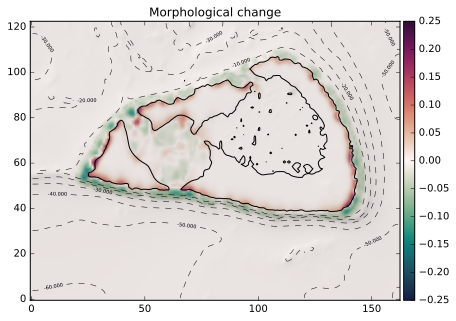

In [8]:
vmin = -0.25
vmax = 0.25
rr = reef.hydro.dh[0]
print rr.min(),rr.max()
reef.mPlot.morphochange(rr, min=vmin, max=vmax, gauss=0, 
                      color=cmocean.cm.curl, fsize=(7.5,5), 
                      fname='deposition.png', dpi=300)

In [ ]:
reef.mPlot.bathymetry(color=cmocean.cm.delta, fsize=(7.5,5), fname='bathy1.png', dpi=300)

### Visualise SWAN outputs

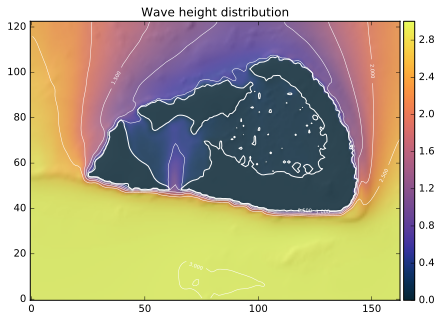

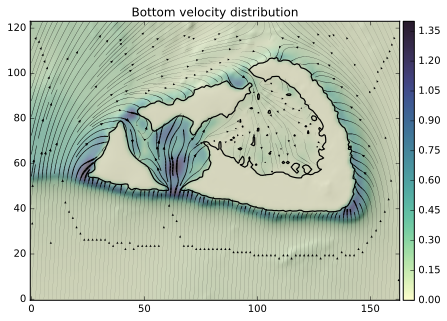

In [9]:
hght = reef.force.wavH[0]
levels = [0.5,1,1.5,2,2.5,3,3.5,4]
reef.mPlot.waveHeight(height=hght, lvls=levels, color=cmocean.cm.thermal, fsize=(7.5,5), fname='height.png', dpi=300)
U = reef.force.wavU[0].T
V = reef.force.wavV[0].T
reef.mPlot.bottomCurrents(U, V, gauss=1., dens=3, color=cmocean.cm.deep, fsize=(7.5,5), fname='currents.png', dpi=300)

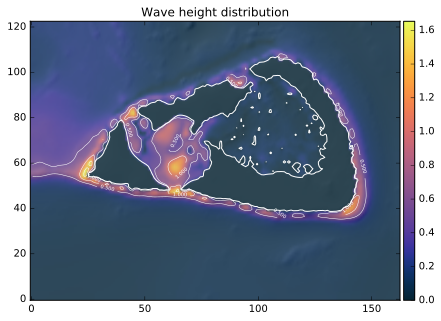

In [10]:
speed = numpy.sqrt(reef.force.wavU[0]**2+reef.force.wavV[0]**2)
levels = [0.5,1,1.5,2,2.5,3]
reef.mPlot.waveHeight(height=speed, lvls=levels, color=cmocean.cm.thermal, fsize=(7.5,5), fname='height.png', dpi=300)

# Run next time step

In [ ]:
# Run model
reef.run_to_time(0.5)

In [ ]:
vmin = -0.5
vmax = 0.5
rr = reef.hydro.dh[0]
print rr.min(),rr.max()
reef.mPlot.morphochange(rr, min=vmin, max=vmax, gauss=0, 
                      color=cmocean.cm.curl, fsize=(7.5,5), 
                      fname='deposition_suspload.png', dpi=300)

In [ ]:
hght = reef.force.wavH[0]
levels = [0.5,1,1.5,2,2.5,3,3.5,4]
reef.mPlot.waveHeight(height=hght, lvls=levels, color=cmocean.cm.thermal, fsize=(7.5,5), fname='height.png', dpi=300)

U = reef.force.wavU[0].T
V = reef.force.wavV[0].T
reef.mPlot.bottomCurrents(U, V, gauss=1., dens=3, color=cmocean.cm.deep, fsize=(7.5,5), fname='currents.png', dpi=300)

# Run in parallel

In [ ]:
!mpiexec -n 1 python mpi_example.py 0.5

In [ ]:
!mpiexec -n 2 python mpi_example.py 0.5

In [ ]:
!mpiexec -n 3 python mpi_example.py 0.5